In [18]:
import nltk
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# accesing News_Category_Dataset

file_path = r'C:\Users\willi\OneDrive\AI ML\Capstone\News_Category_Dataset.json'

data = []

with open(file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)
df

,short_description,headline,date,link,authors,category
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT
...,...,...,...,...,...,...
124984,,Why I Thought I'd Never Live To See 33,2014-04-18,https://www.huffingtonpost.com/entry/a-black-g...,,WOMEN
124985,I often hear people describe cooking for one a...,Five Tips For Cooking For One,2014-04-18,https://www.huffingtonpost.com/entry/five-tips...,"Food Riot, ContributorPlay with your food.",TASTE
124986,,Police Want your Home Video Surveillance Footage,2014-04-18,https://www.huffingtonpost.com/entry/police-wa...,"Robert Siciliano, ContributorPersonal Security...",CRIME
124987,,"Ouch, Natalie Morales",2014-04-18,https://www.huffingtonpost.com/entry/natalie-m...,Katherine Fung,MEDIA


In [20]:
# dataset information looking for cleaning the data if needed.
df.info()
# No null value is observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124989 entries, 0 to 124988
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   short_description  124989 non-null  object
 1   headline           124989 non-null  object
 2   date               124989 non-null  object
 3   link               124989 non-null  object
 4   authors            124989 non-null  object
 5   category           124989 non-null  object
dtypes: object(6)
memory usage: 5.7+ MB


In [21]:
# assign headline as input feature and category as target 
X = df['headline']  # 'headline' as feature
y = df['category']  # 'category' as target

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Tokenization and Text Normalization
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    
    tokens = word_tokenize(text)
    
    tokens = [word.lower() for word in tokens if word.isalnum()]
    
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)


In [23]:
# TF-IDF vectorizer and Multinomial Naive Bayes classifier pipeline
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', MultinomialNB())
])


In [24]:
# Define a grid of hyperparameters for MultinomialNB
param_grid = {
    'clf__alpha': [0.1, 0.5, 1.0, 2.0],  # Alpha hyperparameter 
}

# GridSearchCV cross-validation and scoring for precision_macro
grid_search = GridSearchCV(estimator=text_clf, param_grid=param_grid, cv=5, scoring='precision_macro')

# preprocessing train
grid_search.fit(X_train.apply(preprocess_text), y_train)

# Get the best model and its hyperparameters
best_clf = grid_search.best_estimator_
best_alpha = best_clf.named_steps['clf'].alpha

# Predict categories for the test set
y_pred = best_clf.predict(X_test.apply(preprocess_text))

C:\Users\willi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedM

Overall Precision (Macro): 0.65


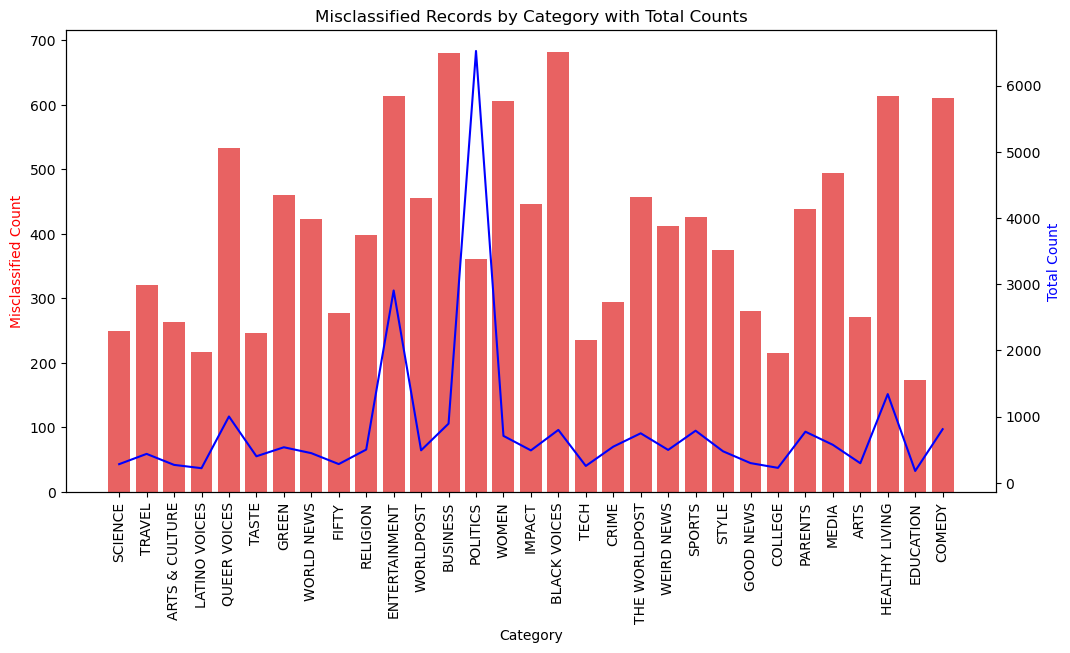

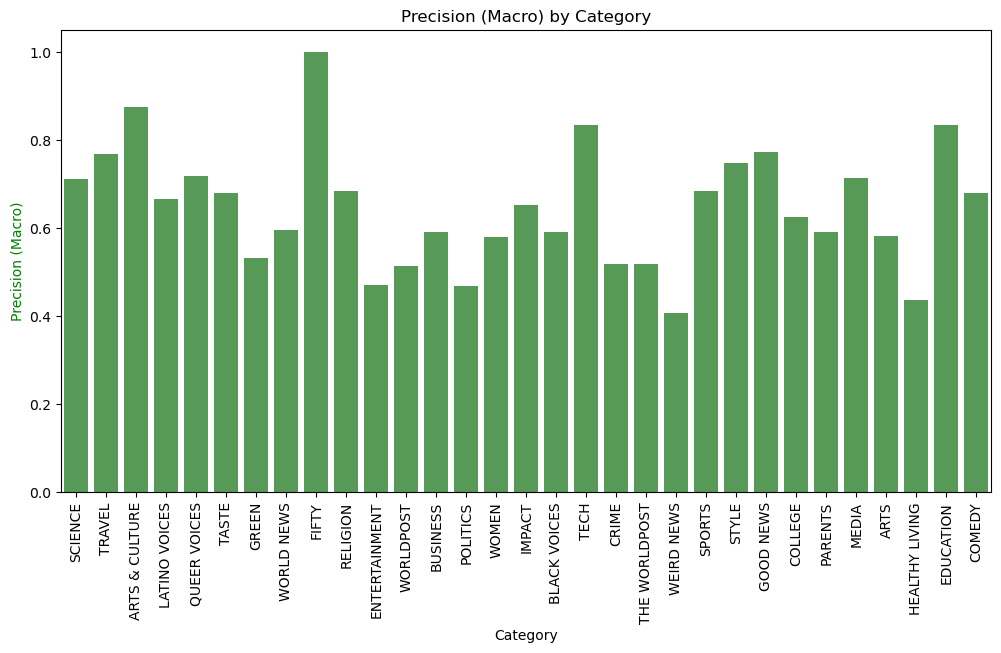

In [25]:

# Calculate the count of misclassified records by category
misclassified_counts = {'Category': list(set(y_test)), 'Misclassified': [sum((y_test != y_pred) & (y_test == category)) for category in set(y_test)]}

# Create a DataFrame for misclassified counts
misclassified_df = pd.DataFrame(misclassified_counts)

# Calculate the total number of records by category
total_counts = {'Category': list(set(y_test)), 'Total': [sum(y_test == category) for category in set(y_test)]}

# Create a DataFrame for total counts
total_df = pd.DataFrame(total_counts)

# Calculate precision scores by category
precision_scores = {'Category': list(set(y_test)), 'Precision': [precision_score(y_test, y_pred, labels=[category], average='macro') for category in set(y_test)]}

# Create a DataFrame for precision scores
precision_df = pd.DataFrame(precision_scores)

# Calculate overall precision
overall_precision = precision_score(y_test, y_pred, average='macro')

# Print overall precision
print(f'Overall Precision (Macro): {overall_precision:.2f}')

# Plot counts misclassified and total counts
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='Category', y='Misclassified', data=misclassified_df, ax=ax1, color='red', alpha=0.7)
ax1.set_xlabel('Category')
ax1.set_ylabel('Misclassified Count', color='red')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2 = ax1.twinx()
sns.lineplot(x='Category', y='Total', data=total_df, ax=ax2, color='blue')
ax2.set_ylabel('Total Count', color='blue')
plt.title('Misclassified Records by Category with Total Counts')

# precision scores by category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Precision', data=precision_df, color='green', alpha=0.7)
plt.xlabel('Category')
plt.ylabel('Precision (Macro)', color='green')
plt.xticks(rotation=90)
plt.title('Precision (Macro) by Category')
plt.show()